In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('bank_deposit.csv')

In [4]:
data.head(-5)

,idcliente,duration,previous,housing,campaign,loan,default,target,muestra
0,1,261,0,1,1,0,0,0,1
1,2,50,0,1,1,0,0,0,1
2,3,1492,0,1,1,0,0,0,1
3,4,104,0,1,1,0,0,0,1
4,5,13,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
10568,10569,270,0,1,1,0,0,1,0
10569,10570,1556,0,1,4,0,0,1,1
10570,10571,226,4,0,1,0,0,1,0
10571,10572,224,0,0,1,0,0,1,1


In [5]:
data['housing'] = data['housing'].astype(object)
data['loan'] = data['loan'].astype(object)
data['default'] = data['default'].astype(object)

In [6]:
data.loc[:,['duration','previous','campaign']].corr(method = "spearman")

,duration,previous,campaign
duration,1.000000,0.007392,-0.045111
previous,0.007392,1.000000,-0.133380
campaign,-0.045111,-0.133380,1.000000


In [7]:
data['target'] = data['target'].astype('int64')

In [8]:
data.target.value_counts()

0    5289
1    5289
Name: target, dtype: int64

### Preparación de los datos 

In [10]:
data['c_housing'] = LabelEncoder().fit_transform(data.housing.values)
data['c_loan'] = LabelEncoder().fit_transform(data.loan.values)
data['c_default'] = LabelEncoder().fit_transform(data.default.values)

In [11]:
data.head(-5)

,idcliente,duration,previous,housing,campaign,loan,default,target,muestra,c_housing,c_loan,c_default
0,1,261,0,1,1,0,0,0,1,1,0,0
1,2,50,0,1,1,0,0,0,1,1,0,0
2,3,1492,0,1,1,0,0,0,1,1,0,0
3,4,104,0,1,1,0,0,0,1,1,0,0
4,5,13,0,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10568,10569,270,0,1,1,0,0,1,0,1,0,0
10569,10570,1556,0,1,4,0,0,1,1,1,0,0
10570,10571,226,4,0,1,0,0,1,0,0,0,0
10571,10572,224,0,0,1,0,0,1,1,0,0,0


In [12]:
X = data[['c_housing','c_loan','duration']]
y = data['target']

In [13]:
X = X.to_numpy()

In [14]:
y = y.to_numpy()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [16]:
X_train_orig = X_train
X_test_orig = X_train

In [17]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

### Modelado

In [18]:
#Validación Cruzada
cv_scores = cross_val_score(RandomForestClassifier(),X_train,y_train,cv=5)

In [19]:
#Random Forest
classifier = RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=600).fit(X_train, y_train)

In [20]:
feature_scores = pd.Series(classifier.feature_importances_, index=['housing','loan','duration']).sort_values(ascending=False)
feature_scores

duration    0.834954
housing     0.127162
loan        0.037883
dtype: float64

### Evaluación 

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
confusion_matrix(y_test, y_pred)

array([[800, 229],
       [243, 844]], dtype=int64)

In [24]:
y_pred_prob = classifier.predict_proba(X_test)

In [26]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [27]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8589988761965556

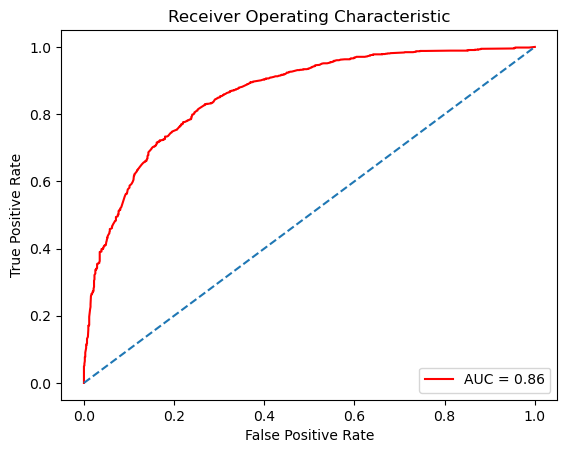

In [28]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
dataf = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test),pd.DataFrame(y_pred),pd.DataFrame(y_pred_prob)],axis=1)

In [30]:
dataf.head(-5)

,0,1,2,0,0,0,1
0,-0.979418,-0.390519,-0.327664,1,1,0.280600,0.719400
1,-0.979418,-0.390519,0.637854,1,1,0.151947,0.848053
2,-0.979418,-0.390519,-0.654321,0,0,0.594480,0.405520
3,-0.979418,-0.390519,1.562901,1,1,0.124813,0.875187
4,1.021015,-0.390519,0.079935,1,0,0.525591,0.474409
...,...,...,...,...,...,...,...
2106,-0.979418,-0.390519,0.146423,1,1,0.231924,0.768076
2107,-0.979418,-0.390519,-0.550254,1,1,0.427409,0.572591
2108,-0.979418,-0.390519,-0.292975,1,1,0.280195,0.719805
2109,-0.979418,-0.390519,0.316978,1,1,0.197031,0.802969


In [31]:
dataf.columns = ['c_housing','c_loan','duration','Target','Target_Pred','Target_Pred_Prob_0','Target_Pred_Prob_1']

In [33]:
dataf.head(-5)

,c_housing,c_loan,duration,Target,Target_Pred,Target_Pred_Prob_0,Target_Pred_Prob_1
0,-0.979418,-0.390519,-0.327664,1,1,0.280600,0.719400
1,-0.979418,-0.390519,0.637854,1,1,0.151947,0.848053
2,-0.979418,-0.390519,-0.654321,0,0,0.594480,0.405520
3,-0.979418,-0.390519,1.562901,1,1,0.124813,0.875187
4,1.021015,-0.390519,0.079935,1,0,0.525591,0.474409
...,...,...,...,...,...,...,...
2106,-0.979418,-0.390519,0.146423,1,1,0.231924,0.768076
2107,-0.979418,-0.390519,-0.550254,1,1,0.427409,0.572591
2108,-0.979418,-0.390519,-0.292975,1,1,0.280195,0.719805
2109,-0.979418,-0.390519,0.316978,1,1,0.197031,0.802969


In [34]:
dataf = pd.concat([pd.DataFrame(X_test_orig),pd.DataFrame(y_test),pd.DataFrame(y_pred),pd.DataFrame(y_pred_prob)],axis=1)

In [38]:
dataf.head(-5)

,0,1,2,0,0,0,1
0,1,0,1080,1.0,1.0,0.280600,0.719400
1,1,0,204,1.0,1.0,0.151947,0.848053
2,0,0,140,0.0,0.0,0.594480,0.405520
3,0,0,373,1.0,1.0,0.124813,0.875187
4,0,0,194,1.0,0.0,0.525591,0.474409
...,...,...,...,...,...,...,...
8452,1,1,82,NaN,NaN,NaN,NaN
8453,1,0,531,NaN,NaN,NaN,NaN
8454,0,0,716,NaN,NaN,NaN,NaN
8455,1,0,83,NaN,NaN,NaN,NaN


In [39]:
dataf.columns = ['c_housing','c_loan','duration','Target','Target_Pred','Target_Pred_Prob_0','Target_Pred_Prob_1']

In [40]:
dataf.head(-5)

,c_housing,c_loan,duration,Target,Target_Pred,Target_Pred_Prob_0,Target_Pred_Prob_1
0,1,0,1080,1.0,1.0,0.280600,0.719400
1,1,0,204,1.0,1.0,0.151947,0.848053
2,0,0,140,0.0,0.0,0.594480,0.405520
3,0,0,373,1.0,1.0,0.124813,0.875187
4,0,0,194,1.0,0.0,0.525591,0.474409
...,...,...,...,...,...,...,...
8452,1,1,82,NaN,NaN,NaN,NaN
8453,1,0,531,NaN,NaN,NaN,NaN
8454,0,0,716,NaN,NaN,NaN,NaN
8455,1,0,83,NaN,NaN,NaN,NaN


In [64]:
df_limpio = dataf.dropna(subset=['Target_Pred_Prob_1'])
df_limpio

,c_housing,c_loan,duration,Target,Target_Pred,Target_Pred_Prob_0,Target_Pred_Prob_1,score
0,1,0,1080,1.0,1.0,0.280600,0.719400,1
1,1,0,204,1.0,1.0,0.151947,0.848053,0
2,0,0,140,0.0,0.0,0.594480,0.405520,0
3,0,0,373,1.0,1.0,0.124813,0.875187,0
4,0,0,194,1.0,0.0,0.525591,0.474409,0
...,...,...,...,...,...,...,...,...
2111,0,0,146,0.0,0.0,0.792938,0.207062,0
2112,0,0,271,0.0,0.0,0.937261,0.062739,0
2113,1,0,41,1.0,1.0,0.274800,0.725200,0
2114,0,0,368,1.0,1.0,0.155171,0.844829,0


In [60]:
def clasificar_valor(valor, quantiles):
    if valor <= quantiles[0]:
        return "Muy Bajo"
    elif valor <= quantiles[1]:
        return "Bajo"
    elif valor <= quantiles[2]:
        return "Medio"
    elif valor <= quantiles[3]:
        return "Alto"
    else:
        return "Muy alto"

In [88]:
def score2(df):
    deciles = df['Target_Pred_Prob_1'].quantile(q=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1]).tolist()
    quantiles = df['Target_Pred_Prob_1'].quantile(q=[0.20,0.40,0.60,0.80]).tolist()
    total_1=(df['Target_Pred']==1).sum()
    total = df.shape[0]
    total_porcentaje = total_1/total
    LIFT=[]
    valor=[]
    for lif in deciles:
        LIFT.append(lif/total_porcentaje)
        valor.append(clasificar_valor(lif,quantiles))
    return LIFT,valor

In [84]:
Lift,score2=score2(df_limpio)
score2

['Muy Bajo',
 'Muy Bajo',
 'Bajo',
 'Bajo',
 'Medio',
 'Medio',
 'Alto',
 'Alto',
 'Muy alto',
 'Muy alto']

In [87]:
score = []
for dur in df_limpio.duration:
    if dur < 1000:
        score.append("Bajo")
    elif dur < 3000:
        score.append("Medio")
    elif dur >= 3000:
        score.append("Alto")

df_limpio['score'] = score
df_limpio

C:\Users\laboratorioesan\AppData\Local\Temp\ipykernel_21760\295509679.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['score'] = score


,c_housing,c_loan,duration,Target,Target_Pred,Target_Pred_Prob_0,Target_Pred_Prob_1,score
0,1,0,1080,1.0,1.0,0.280600,0.719400,Medio
1,1,0,204,1.0,1.0,0.151947,0.848053,Bajo
2,0,0,140,0.0,0.0,0.594480,0.405520,Bajo
3,0,0,373,1.0,1.0,0.124813,0.875187,Bajo
4,0,0,194,1.0,0.0,0.525591,0.474409,Bajo
...,...,...,...,...,...,...,...,...
2111,0,0,146,0.0,0.0,0.792938,0.207062,Bajo
2112,0,0,271,0.0,0.0,0.937261,0.062739,Bajo
2113,1,0,41,1.0,1.0,0.274800,0.725200,Bajo
2114,0,0,368,1.0,1.0,0.155171,0.844829,Bajo


In [89]:
deciles = df_limpio['Target_Pred_Prob_1'].quantile(q=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1]).tolist()

In [90]:
deciles

[0.08764443854143074,
 0.17235099159896614,
 0.27611074942780117,
 0.34643024106300724,
 0.5317039951139099,
 0.690983026001328,
 0.7391382114066889,
 0.8061670496131997,
 0.8531812213251878,
 0.898111506115312]

In [ ]:
df_limpio['score'] = score
df_limpio